In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


# Input(x) & Output(y)

In [2]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

(0.0, 8.0)

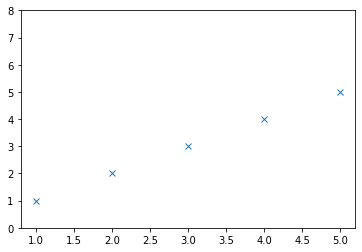

In [3]:
plt.plot(x_data, y_data, 'x')
plt.ylim(0,8)

* reduce_mena() & square()

In [4]:
# 입력값이 float type이어야 float로 출력 

v = [1., 2., 3., 4.]

a = tf.reduce_mean(v)
b = tf.square(3)

print(a.numpy())
print(b.numpy())

2.5
9


# Hypothesis

* H(x) = Wx + b

In [6]:
# 초깃값 W, b 정의

W = tf.Variable(2.0)
b = tf.Variable(0.5)
W.numpy(), b.numpy()

(2.0, 0.5)

In [7]:
hypothesis = W * x_data + b
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

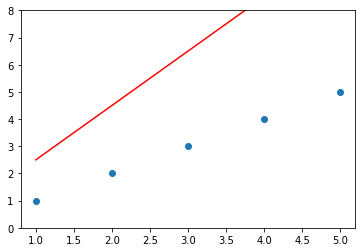

In [8]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

# Cost

In [9]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [14]:
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
                          
W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

# Update Parameter

In [16]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.5, 0.36)

# Iterate

    0|    1.3684|    0.3228|  3.959600
   10|    0.9737|    0.2061|  0.025049
   20|    0.9488|    0.1921|  0.006808
   30|    0.9488|    0.1853|  0.006287
   40|    0.9504|    0.1791|  0.005875
   50|    0.9521|    0.1731|  0.005490
   60|    0.9537|    0.1673|  0.005131
   70|    0.9552|    0.1618|  0.004795
   80|    0.9567|    0.1564|  0.004481
   90|    0.9581|    0.1512|  0.004187


(0.0, 8.0)

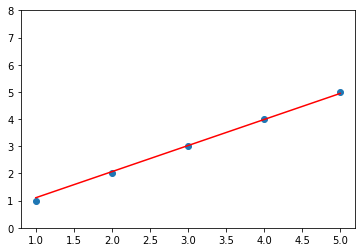

In [18]:
for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W,b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0,8)

# Predict

In [19]:
print(W * 5 + b)
print(W * 2.6 + b)

tf.Tensor(4.9435616, shape=(), dtype=float32)
tf.Tensor(2.6410313, shape=(), dtype=float32)


# Sum up

In [21]:
# Data
x = [1,2,3,4,5]
y = [1,2,3,4,5]

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# W, b update
learning_rate = 0.001
for i in range(100):
    #Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x + b
        cost = tf.reduce_mean(tf.square(hypothesis - y))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
        
print()

#predict
print(W * 5 + b)
print(W * 2.5 +b)

    0|    2.8552|    0.4876| 45.660004
   10|    2.4616|    0.3787| 28.284033
   20|    2.1517|    0.2929| 17.520519
   30|    1.9079|    0.2255| 10.853079
   40|    1.7159|    0.1724|  6.722954
   50|    1.5649|    0.1306|  4.164561
   60|    1.4460|    0.0978|  2.579767
   70|    1.3524|    0.0720|  1.598069
   80|    1.2787|    0.0516|  0.989959
   90|    1.2208|    0.0357|  0.613266

tf.Tensor(5.9202814, shape=(), dtype=float32)
tf.Tensor(2.9722617, shape=(), dtype=float32)
